<a href="https://colab.research.google.com/github/uday2510/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular_Risk_Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Uday Naidu


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/uday2510/Cardiovascular-Risk-Prediction

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import pandas as pd                                                                 #Library for pandas
import numpy as np                                                                  #Library for Numpy
from datetime import datetime                                                       #Datetime library
import matplotlib.pyplot as plt                                                     #Library for Visualization from matplotlib
import seaborn as sns                                                               #Library for seaborn visualization
from sklearn.preprocessing import StandardScaler                                    #Library for feature scaling
from sklearn.model_selection import train_test_split                                #Library for splitting the dataset
from sklearn.linear_model import LinearRegression                                   #Library for  ML Model
from sklearn.metrics import mean_absolute_error ,r2_score, mean_squared_error       #Library for  checking accuracy and evaluation
from sklearn.model_selection import GridSearchCV                                    #Library for hyperparamter tuning
from sklearn.linear_model import Ridge                                              #Library for regularizaton
from sklearn.neighbors import LocalOutlierFactor                                    #Library for outlier detection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                       #Library for Categorical encoding
from imblearn.combine import SMOTETomek                                             #Library for handling imbalance dataset

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path='/content/drive/MyDrive/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

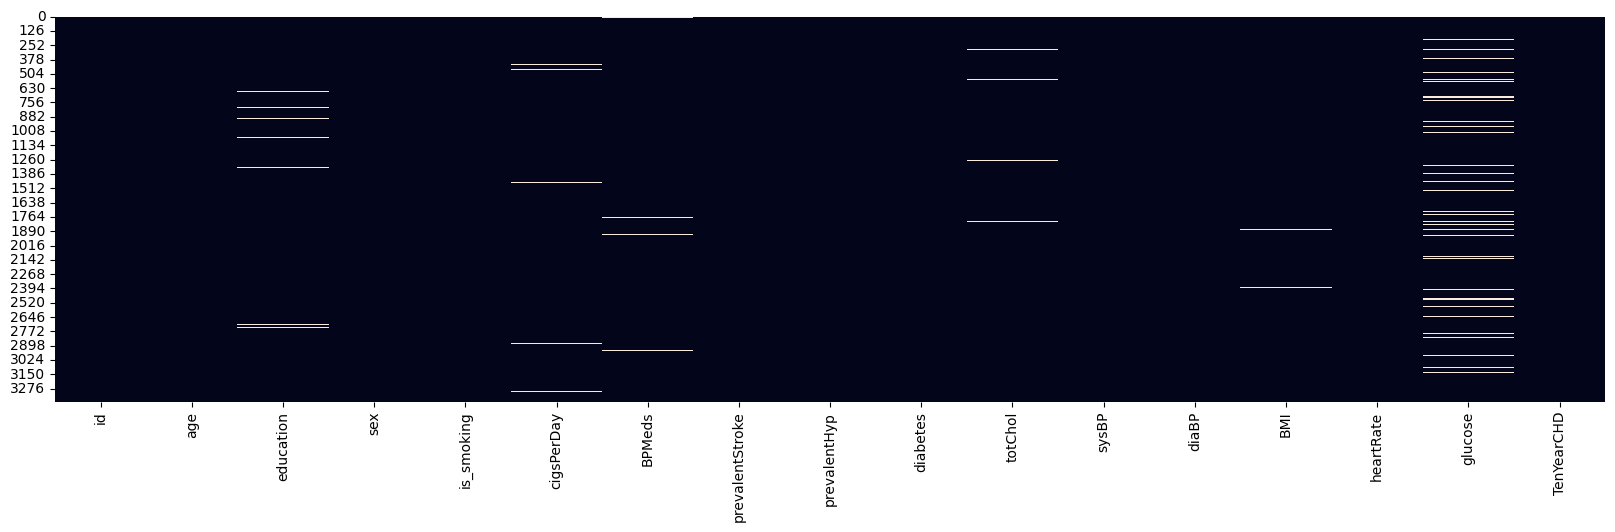

In [9]:
# Visualizing the missing values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False, cmap='rocket')

### What did you know about your dataset?

**This dataset consist of 3390 rows & 17 columns, which has no duplicated values but has null value in 7 features i.e (education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose).**

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
unique_values=df.nunique().reset_index()
unique_values

,index,0
0,id,3390
1,age,39
2,education,4
3,sex,2
4,is_smoking,2
5,cigsPerDay,32
6,BPMeds,2
7,prevalentStroke,2
8,prevalentHyp,2
9,diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [58]:
# Dropping nan values
df1=df.dropna().reset_index()
print(df1.shape)
print(df.shape)

(2927, 18)
(3390, 17)


In [14]:
df1.drop(['id'],inplace=True,axis=1)

<ipython-input-14-7a1b83226d3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['id'],inplace=True,axis=1)


In [15]:
df1.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### What all manipulations have you done and insights you found?

**Since the null values were very less so i dropped the nan values from the entire data set  and stored in in a new variable.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [16]:
# Chart - 1 visualization code
df1['prevalentStroke'].value_counts()

0    2909
1      18
Name: prevalentStroke, dtype: int64

Text(0, 0.5, 'heartRate')

<Figure size 1800x1000 with 0 Axes>

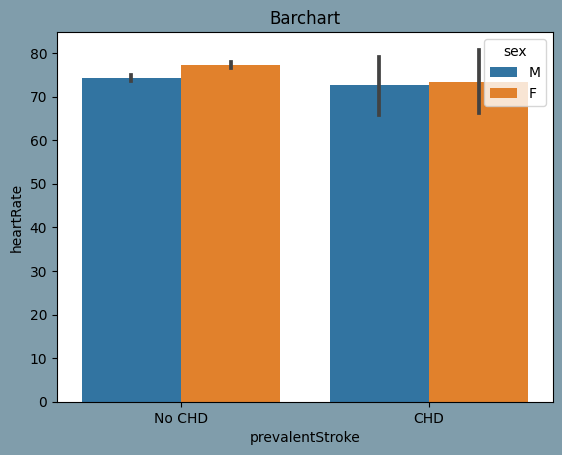

In [17]:
plt.figure(figsize=(18,10))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1, x=df1['prevalentStroke'], y=df1['heartRate'],hue='sex')
plt.xticks(ticks=[0, 1], labels=['No CHD', 'CHD'])
plt.title('Barchart')
plt.xlabel('prevalentStroke')
plt.ylabel('heartRate')


##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between prevalentStroke variable and heart rate  taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 2

Text(0, 0.5, 'features')

<Figure size 1800x1000 with 0 Axes>

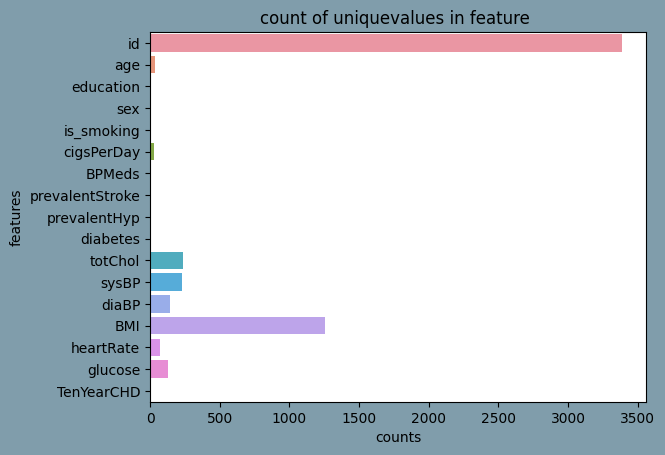

In [18]:
#visualizing unique values of each feature
plt.figure(figsize=(18,10))
plt.figure(facecolor='#809dab')
sns.barplot(data=unique_values, x=0,y='index')
plt.title('count of uniquevalues in feature ')
plt.xlabel('counts')
plt.ylabel('features')

##### 1. Why did you pick the specific chart?

**I have used this chart to visualize the no of unique values present in each feature**

##### 2. What is/are the insight(s) found from the chart?

**I have found that BMI column has the most no of unique value ,where as expect BMI other columns like glucose ,heartrate,diaBP,ysBP,totalChol and age hase very less number of unique value**

#### Chart - 3

Text(0.5, 1.0, 'Distribution of TenYearCHD')

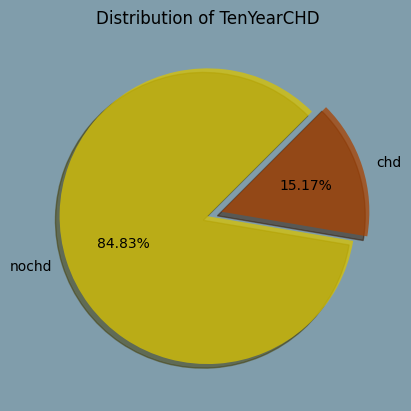

In [19]:
x=df1['TenYearCHD'].value_counts()
label=['nochd','chd']
plt.figure(facecolor='#809dab')
plt.pie(x.values, labels= label, autopct='%1.2f%%',startangle=45,colors=['#d9c302','#a84303'],shadow=True,explode=(0,0.1),wedgeprops={'alpha':0.75})
plt.title('Distribution of TenYearCHD')

##### 1. Why did you pick the specific chart?

**I did use this pie chart for visualise the distribution of target variable**

##### 2. What is/are the insight(s) found from the chart?

**The insights i found is that the taret feature is highly imbalanced which would affect the ml model to predict as the model will give baised output due to the imbalanced dataset**

#### Chart - 4

In [20]:
df1['is_smoking'].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

Text(0.5, 1.0, 'Distribution of TenYearCHD')

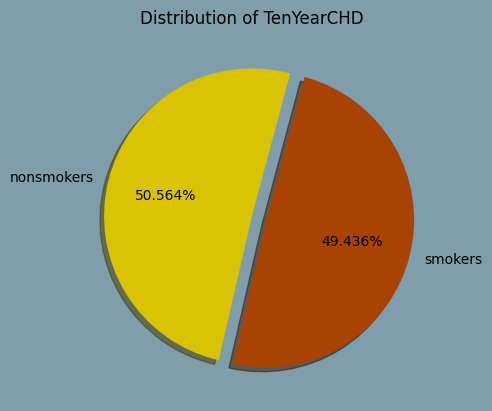

In [21]:
# Chart - 4 visualization code
df1['is_smoking'].value_counts()
plt.figure(facecolor='#809dab')
labels=['nonsmokers','smokers']
plt.pie(df1['is_smoking'].value_counts().values, labels=labels, autopct='%1.3f%%', startangle=75,colors=['#d9c302','#a84303'],shadow=True,explode=(0,0.1))
plt.title('Distribution of TenYearCHD')

##### 1. Why did you pick the specific chart?

**I did use this pie chart to visualise the distribution of smokers and nonsmokers**

##### 2. What is/are the insight(s) found from the chart?

**I can visulize that 50.64 % people are non smokers where as 49.436 people are smokers**

#### Chart - 5

In [22]:
df1['TenYearCHD'].value_counts().index

Int64Index([0, 1], dtype='int64')

Text(0, 0.5, 'totChol')

<Figure size 1800x500 with 0 Axes>

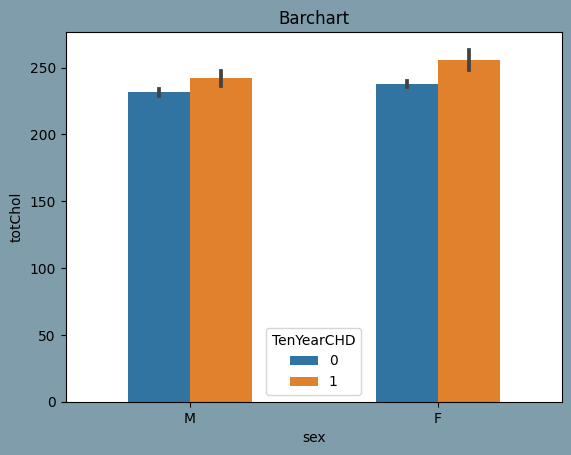

In [23]:
# Chart - 5 visualization code
plt.figure(figsize=(18,5))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1 , x='sex' , y='totChol',hue='TenYearCHD',width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('totChol')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between totchol variable and target variable taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found in this chart is that the males and females having total cholestrol level more then 230 has the risk of CHD**

#### Chart - 6

Text(0, 0.5, 'Bloodpressure')

<Figure size 1800x500 with 0 Axes>

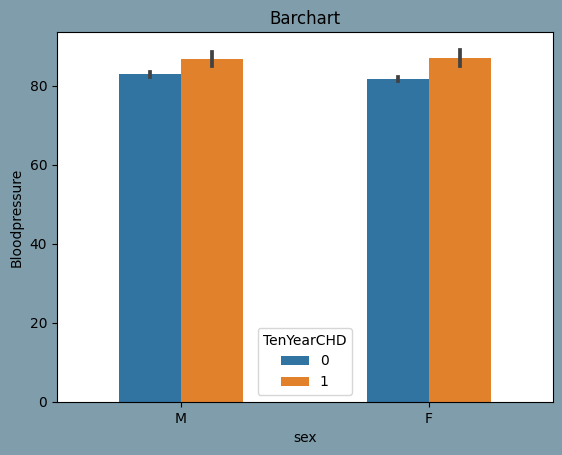

In [24]:
# Chart - 6 visualization code
plt.figure(figsize=(18,5))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1 , x='sex' , y='diaBP',hue='TenYearCHD',width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('Bloodpressure')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between diaBP and target variable taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found in this chart is that the males and females having blood pressure level more then 80 has the risk of CHD**

#### Chart - 7

Text(0, 0.5, 'age')

<Figure size 1800x500 with 0 Axes>

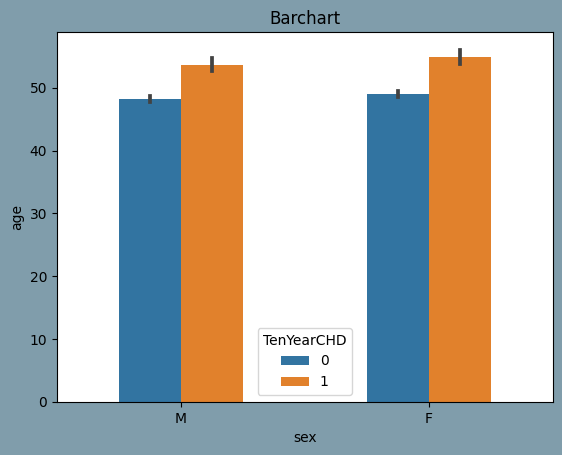

In [25]:
# Chart - 7 visualization code
plt.figure(figsize=(18,5))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1 , x='sex' , y='age',hue= 'TenYearCHD', width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('age')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between age and target variable taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found in this chart is that the males and females having age more then 50 has the high risk of CHD**

#### Chart - 8

Text(0, 0.5, 'cigsPerDay')

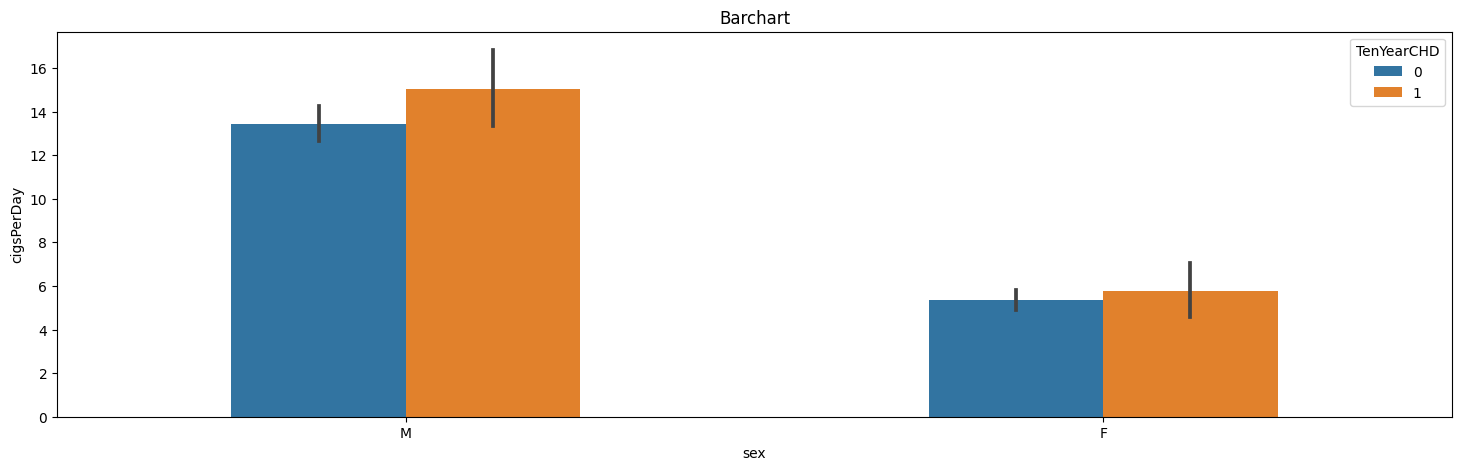

In [26]:
# Chart - 8 visualization code
plt.figure(figsize=(18,5))

sns.barplot(data=df1, x= 'sex', y='cigsPerDay', hue='TenYearCHD', width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('cigsPerDay')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between sex and no of cigs per day taking hue as target variable**

##### 2. What is/are the insight(s) found from the chart?

**I can visualize that female smokers are very less as compared to male smokers,male smoker who smoker more than 13 cigs per day had more risk of CHD where as female smoker who smokes more than 5 cigs per day has more cigs has more risk of CHD**

Answer Here

#### Chart - 9

Text(0, 0.5, 'HeartRate')

<Figure size 1800x800 with 0 Axes>

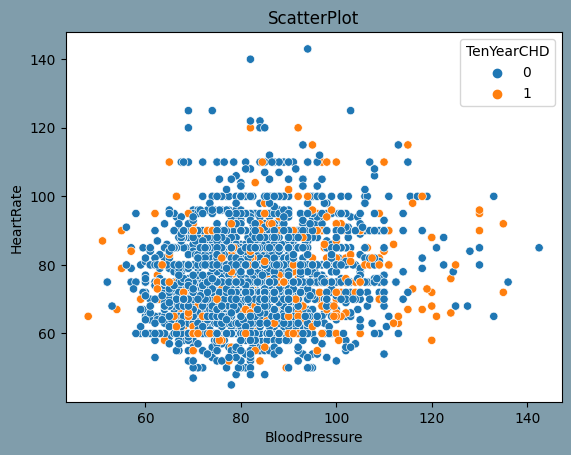

In [27]:
# Chart - 10 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.scatterplot(x=df1['diaBP'], y=df1['heartRate'], hue=df1['TenYearCHD'])
plt.title('ScatterPlot')
plt.xlabel('BloodPressure')
plt.ylabel('HeartRate')

##### 1. Why did you pick the specific chart?

**i have used this scatterplot to see how scatter the data of bloodpressure and heartrate feature are with respect to each other and with the target variable**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found from this chart is that the blood pressure and heart rate are slightly Linear which means that increase in blood pressure will increase the heart Rate which ultimately increases risk of CHD**

#### Chart - 10

Text(0, 0.5, 'HeartRate')

<Figure size 1800x800 with 0 Axes>

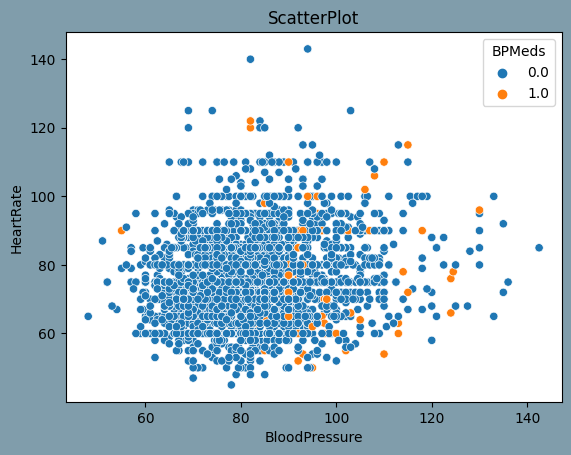

In [28]:
# Chart - 11 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.scatterplot(x=df1['diaBP'], y=df1['heartRate'], hue=df1['BPMeds'])
plt.title('ScatterPlot')
plt.xlabel('BloodPressure')
plt.ylabel('HeartRate')

##### 1. Why did you pick the specific chart?

**i have used this scatterplot to see how scatter the data of bloodpressure and heart rate feature are with respect to each other and with BPMeds column**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found from this chart is that the blood pressure and heart rate are slightly Linear and the data points of peopls consuming BP medicines are more than the one's who are not consuming**

#### Chart - 11

Text(0, 0.5, 'BMI')

<Figure size 1800x800 with 0 Axes>

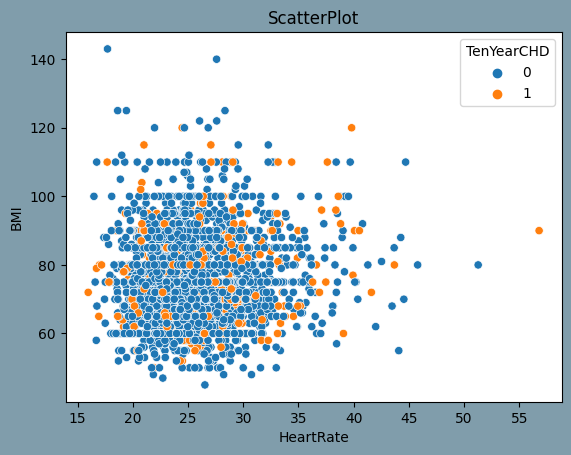

In [29]:
# Chart - 12 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.scatterplot(x=df1['BMI'], y=df1['heartRate'],hue= df['TenYearCHD'])
plt.title('ScatterPlot')
plt.xlabel('HeartRate')
plt.ylabel('BMI')

##### 1. Why did you pick the specific chart?

**i have used this scatterplot to see how scatter the data of BMi and heart rate feature are with respect to each other and with Target Columns**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found from this chart is that the BMI and heart rate are not Linear**

In [30]:
df1.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Chart - 12

Text(0.5, 1.0, 'BoxPlot')

<Figure size 1800x800 with 0 Axes>

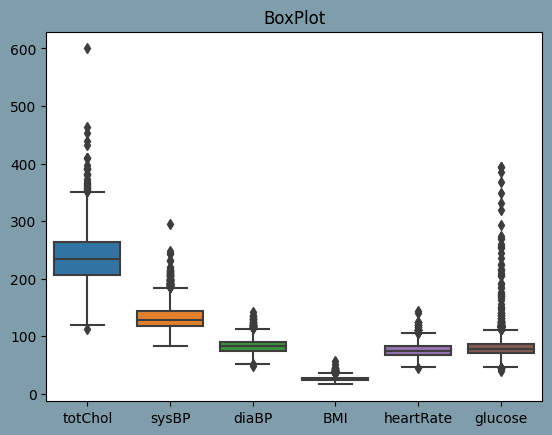

In [31]:
# Chart - 13 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.boxplot(df1[['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']])
plt.title('BoxPlot')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-bda47edfd5f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df1.corr()


<Axes: >

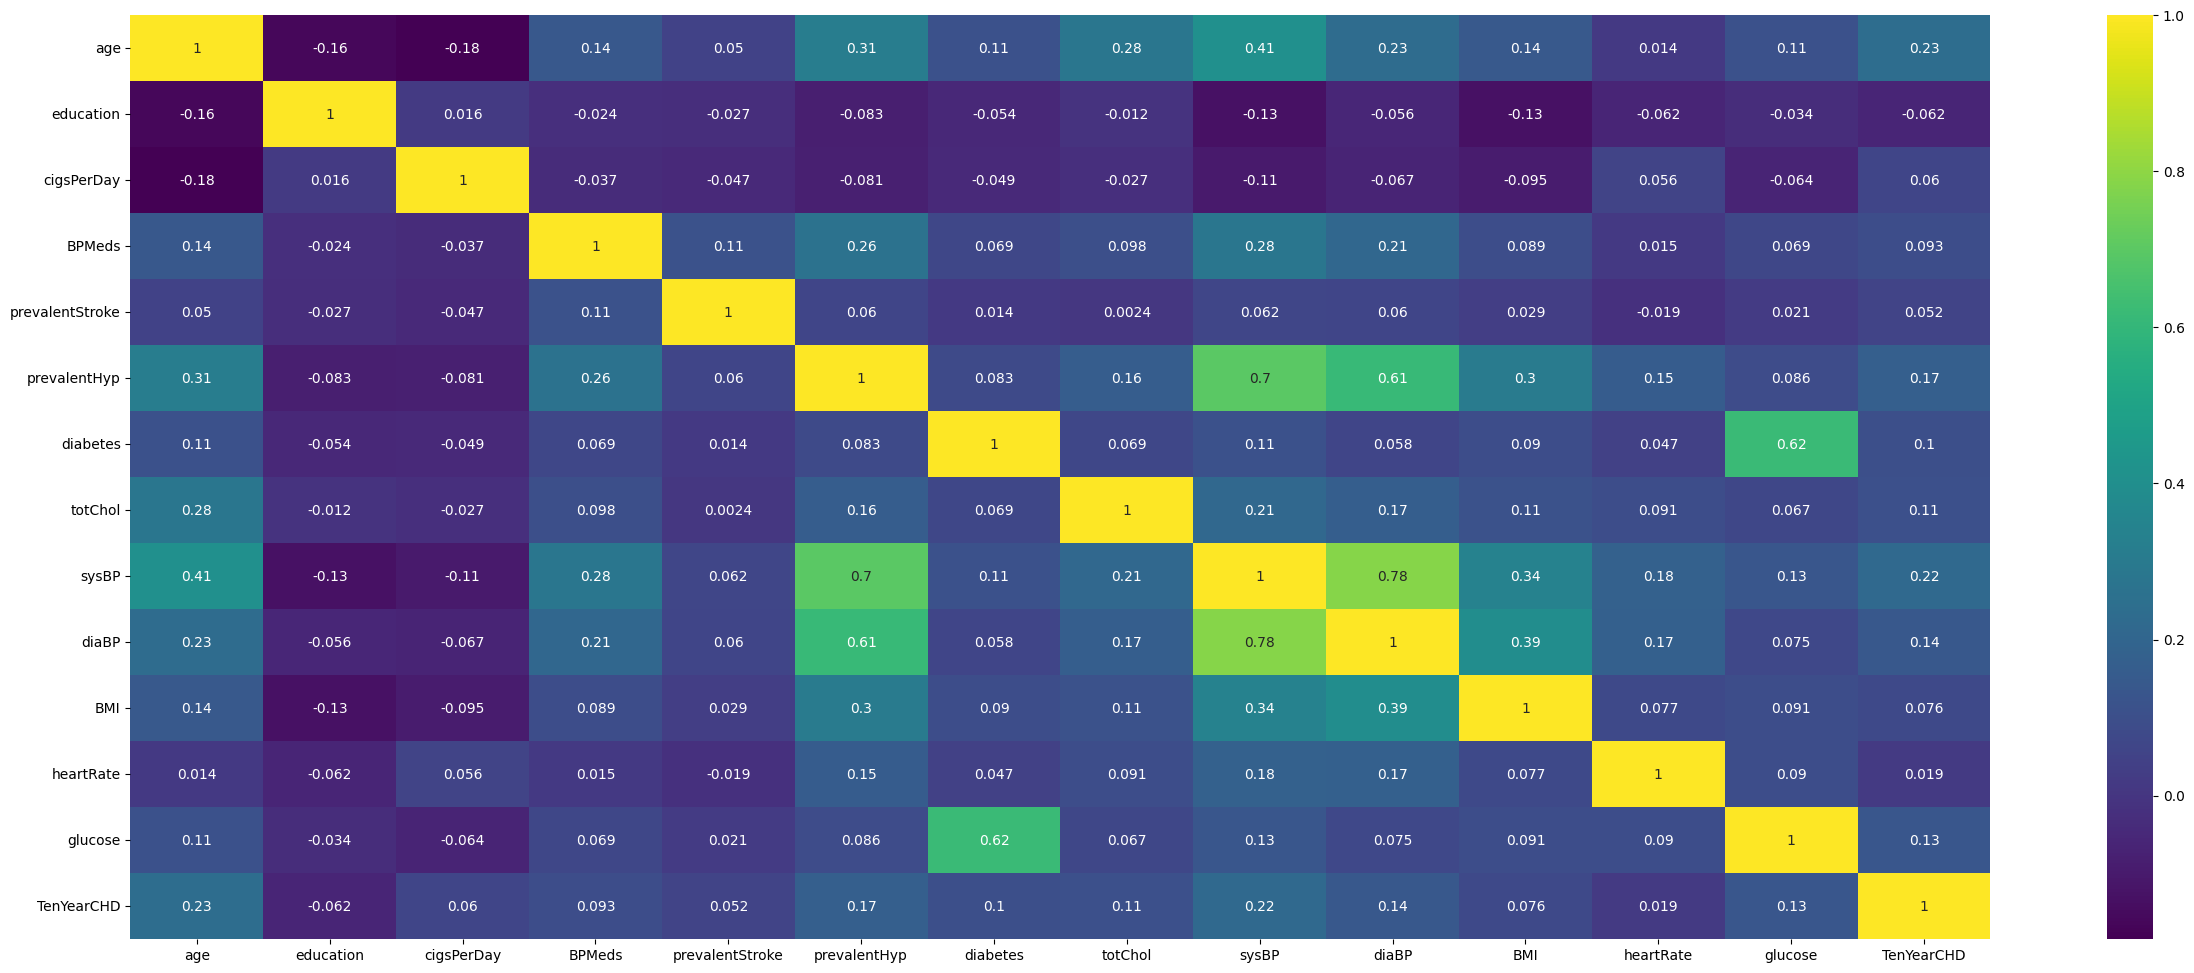

In [32]:
# Correlation Heatmap visualization code
correlation=df1.corr()
plt.figure(figsize=(30,12))
sns.heatmap(correlation,annot=True,cmap='viridis')

##### 1. Why did you pick the specific chart?

**I have used this heatmap to see how the features are correlated with each other**

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1[5:14])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Since  very few values were missing thus no need to  impute missing values as i have dropped the null values**

### 2. Handling Outliers

In [56]:
# Handling Outliers & Outlier treatments
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)
predictions = lof.fit_predict(df1[['totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']])
lof_index=np.where(predictions<0)
lof_index[0]

array([  16,   66,  113,  206,  281,  286,  368,  374,  476,  490,  547,
        604,  629,  671,  682,  686,  725,  773,  828,  831,  920, 1007,
       1052, 1105, 1153, 1212, 1350, 1379, 1475, 1480, 1510, 1558, 1564,
       1577, 1582, 1584, 1669, 1672, 1678, 1690, 1714, 1752, 1779, 1806,
       1807, 1816, 1856, 1886, 1960, 2000, 2080, 2205, 2349, 2468, 2533,
       2594, 2675, 2789, 2884])

In [63]:
new_df=df1.drop(index=lof_index[0])
new_df

,index,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,3384,3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
2923,3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
2924,3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
2925,3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


##### What all outlier treatment techniques have you used and why did you use those techniques?

**I have used local outlier factor technique to detect and remove the local outliers from the dataset**   

### 3. Categorical Encoding

In [62]:
# Encode your categorical columns
le = LabelEncoder()
new_df['sex']= le.fit_transform(new_df['sex'])
new_df['is_smoking']= le.fit_transform(new_df['is_smoking'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

**I had 2 columns which where categorical columns which were sex and is smoking column.so i used label encoder to encode them the dataframe**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

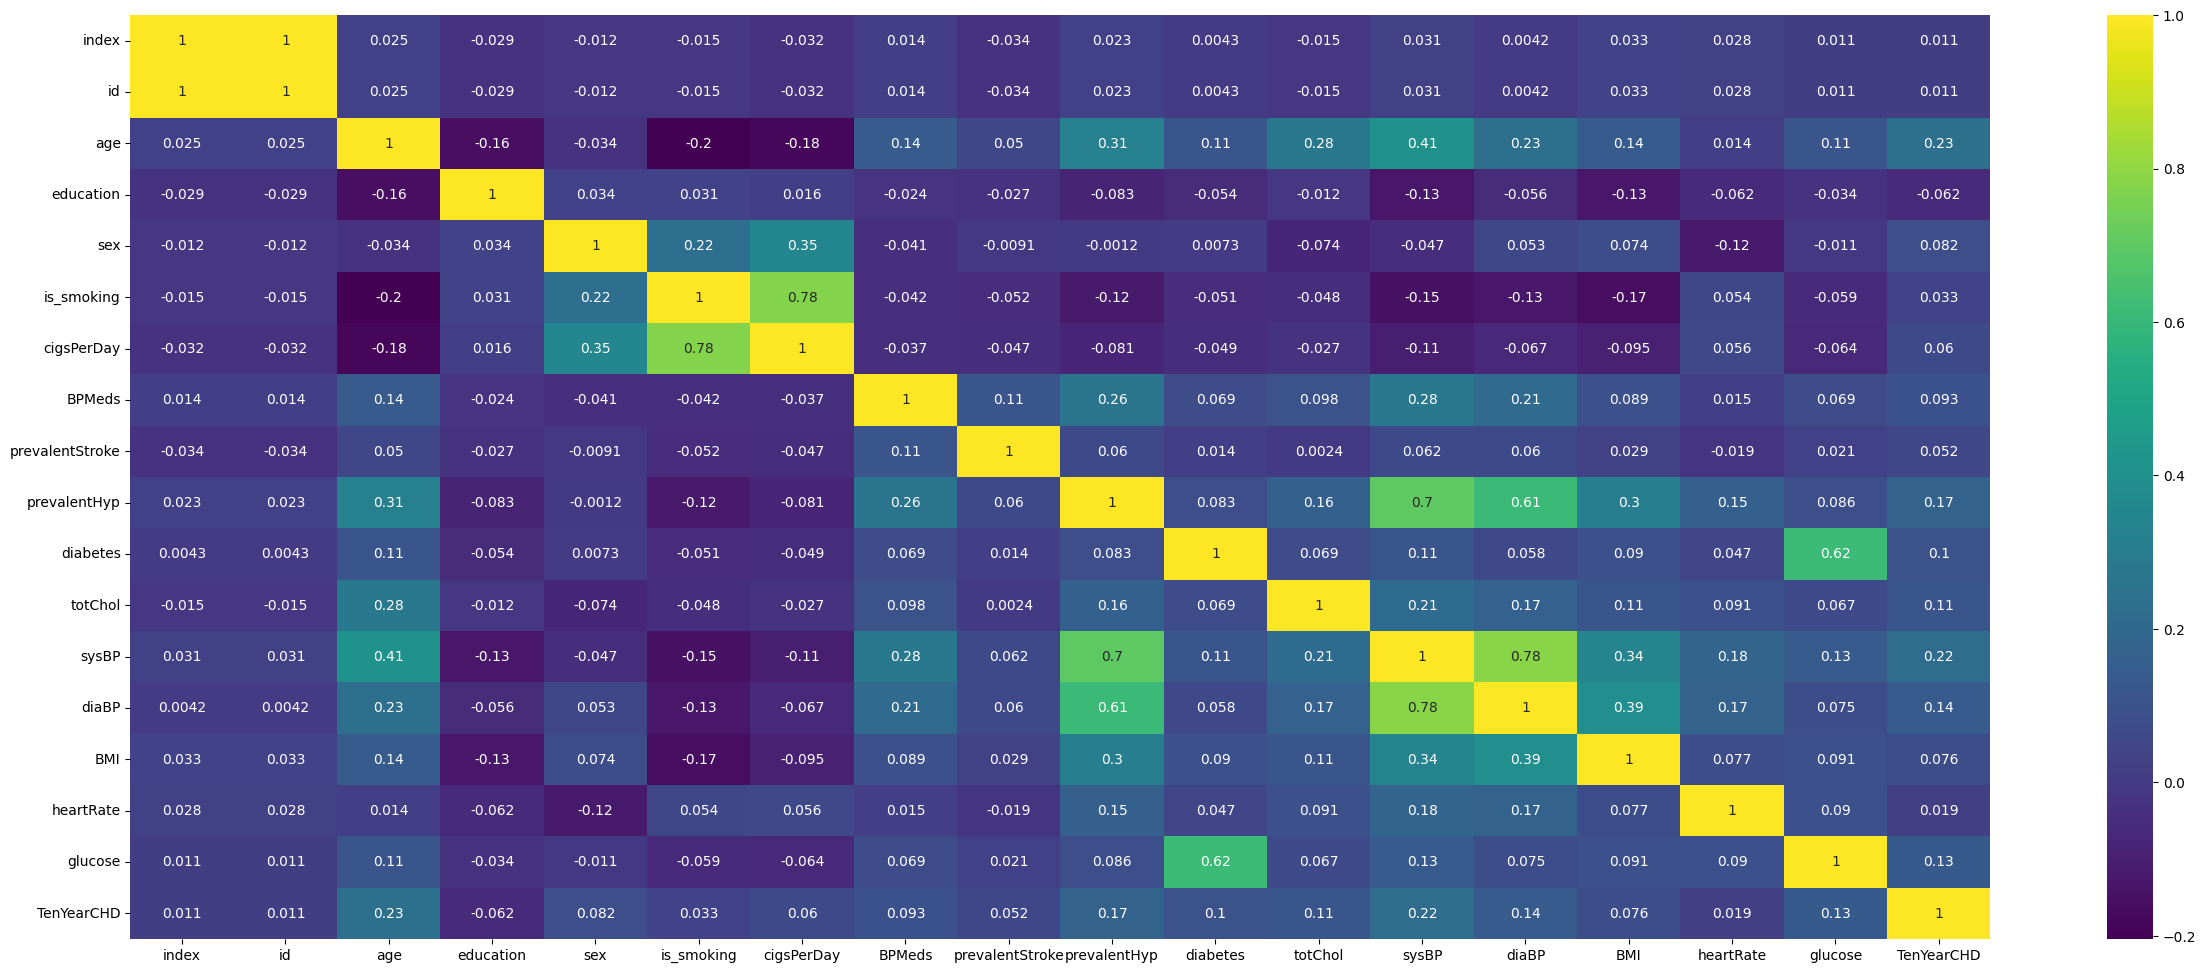

In [64]:
# Manipulate Features to minimize feature correlation and create new features
correlation=df1.corr()
plt.figure(figsize=(30,12))
sns.heatmap(correlation,annot=True,cmap='viridis')

**Since there were no  high multicollinearity found within the independant variable there was no need to manipulate or drop any feature**

### 5. Handling Imbalanced Dataset

In [81]:
new_df['TenYearCHD'].value_counts()

0    2447
1     421
Name: TenYearCHD, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

**Yes the dataset is imbalanced as we can see that the target variable consist only 421 CHD cases out of 2868 records.**

In [85]:
# Handling Imbalanced Dataset (If needed)
x=new_df.drop('TenYearCHD',axis=1)
y=new_df['TenYearCHD']
sm= SMOTETomek()
sx,sy=sm.fit_resample(x,y)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**I have used SMOTETomek technique to solve the imbalance dataset problem as SMOTETomek uses combination of undersampling and oversampling techniques of the majority samples and minority samples**

### 8. Data Splitting

In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sx, sy, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

**We have used 80:20 split ratio with respect to train and test data.**

### 6. Data Scaling

In [96]:
# Scaling your data
ss=StandardScaler()
X_train=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
print(X_train.shape)
print(X_test.shape)

(3835, 17)
(959, 17)


##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***